<a href="https://colab.research.google.com/github/tazwarmahmud/Data-analysis-project-for-marketing-campaigns-of-telecom-company/blob/main/Tazwar_Mahmud_Assessment_Task_3_10_Nov_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data analysis project for marketing campaigns of telecom company**

### Name: Tazwar Mahmud
### Student ID: 25501166
Email: tazwar.mahmud@student.uts.edu.au

### Step 1: Data Loading and Cleaning

In [ ]:
#importing necessary library to load the dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
data=pd.read_csv('/content/TeleCom_Data-1 (1).csv')
data.head()

age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  40;"admin.";"married";"basic.6y";"no";"no";"no...                                                                                                                                                                          
1  56;"services";"married";"high.school";"no";"no...                                                                                                                                                                          
2  45;"services";"married";"basic.9y";"unknown";"...                                                                                                                                                                          
3  59;"admin.";"married";"professional.course";"n...                                                                                                                                                                          
4  41;"blue-collar";"married";"unknown";"unknown"...

Seems like the dataset isn't clean and we need to deal with double quotes and delimiter.

In [ ]:
#Using 'StringIO' to clean the dataset by removing double quotes and re-reading the data with ';' as the delimiter
from io import StringIO

from io import StringIO
with open('/content/TeleCom_Data-1 (1).csv','r') as file:
    data = file.read()
data = data.replace('"', '')

data = pd.read_csv(StringIO(data),sep=';')
data.head()

age          job  marital            education  default housing loan  \
0   40       admin.  married             basic.6y       no      no   no   
1   56     services  married          high.school       no      no  yes   
2   45     services  married             basic.9y  unknown      no   no   
3   59       admin.  married  professional.course       no      no   no   
4   41  blue-collar  married              unknown  unknown      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

Dataset is transformed successfully.

In [ ]:
#checking data shape
data.shape

(41180, 21)

In [ ]:
#checking null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [ ]:
#checking for duplicate values
data.duplicated().sum()

12

We didn't drop duplicates here cause here duplicates doesn't mean the same person, it can be different individual as well.

In [ ]:
#checking all the unique values under each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print('\n')

Unique values in 'age':
[40 56 45 59 41 24 25 29 57 35 54 46 39 30 55 37 49 34 52 58 32 38 44 42
 60 53 50 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Unique values in 'job':
['admin.' 'services' 'blue-collar' 'technician' 'housemaid' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Unique values in 'marital':
['married' 'single' 'divorced' 'unknown']


Unique values in 'education':
['basic.6y' 'high.school' 'basic.9y' 'professional.course' 'unknown'
 'basic.4y' 'university.degree' 'illiterate']


Unique values in 'default':
['no' 'unknown' 'yes']


Unique values in 'housing':
['no' 'yes' 'unknown']


Unique values in 'loan':
['no' 'yes' 'unknown']


Unique values in 'contact':
['telephone' 'cellular']


Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Unique values in 'day_of_week':
['mon' 

In [ ]:
#replacing dots ('.') with spaces in the 'education' column
data['education']=data['education'].str.replace('.',' ')
data['education'].unique()

array(['basic 6y', 'high school', 'basic 9y', 'professional course',
       'unknown', 'basic 4y', 'university degree', 'illiterate'],
      dtype=object)

### **Step 2: Correlation Analysis**

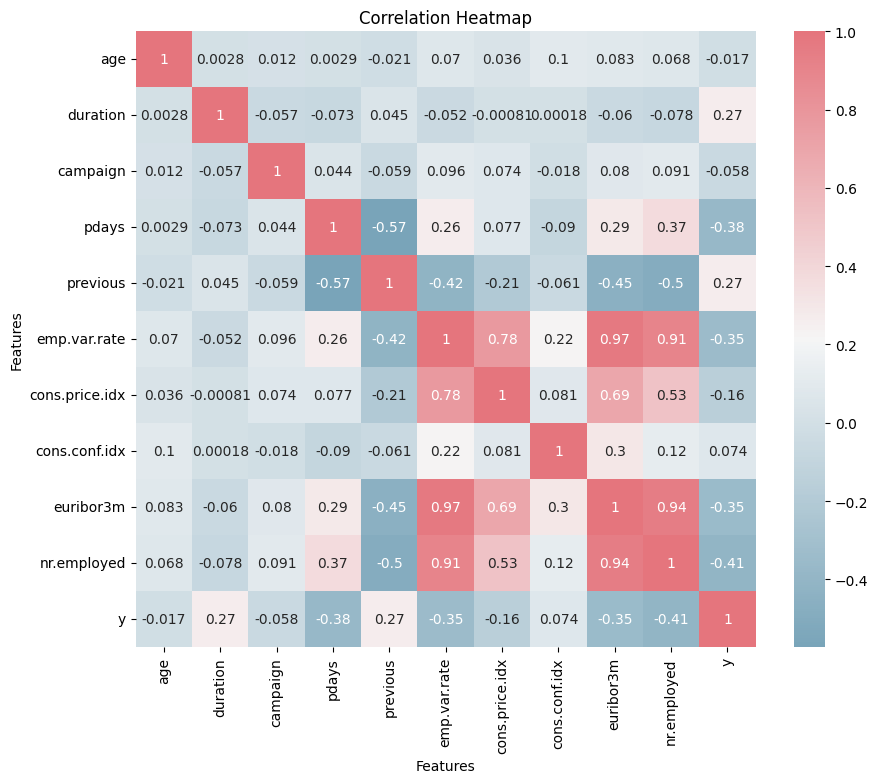

In [ ]:
#correlation matrix to understand relation between variables
import seaborn as sns
import matplotlib.pyplot as plt


#Selecting only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), cmap=sns.diverging_palette(230, 10, n=1001), alpha=0.7, annot=True)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [ ]:
#Installing the 'dataprep' package (necessary for further EDA tasks)
!pip install dataprep

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 82.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could


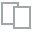
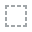
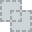
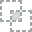
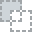
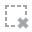
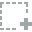
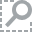
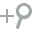
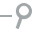
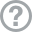
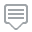
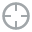
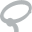
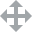
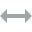
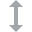
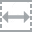
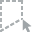
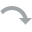
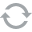
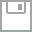
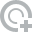
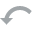
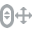
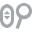
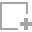
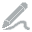
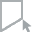
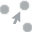
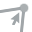
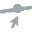

In [ ]:
#encoding 'y' column as (1 for 'yes', 0 for 'no') and correlation with other variables
from dataprep.eda import plot_correlation
from dataprep.eda import plot_correlation
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)
plot_correlation(data, 'y')

In [ ]:
#Describing the dataset for summary statistics
data.describe()

age      duration      campaign         pdays      previous  \
count  41180.000000  41180.000000  41180.000000  41180.000000  41180.000000   
mean      40.021710    258.280427      2.567800    962.516707      0.172705   
std       10.419593    259.299856      2.770225    186.809028      0.493719   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41180.000000    41180.000000   41180.000000  41180.000000   
mean       0.081901       93.575508     -40.501999      3.621422   
std        1.571037        0.578762       4.627358      1.734385   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed             y  
count  41180.000000  41180.000000  
mean    5167.053344      0.112627  
std       72.230334      0.316141  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

### **Step 3: Univariate Analysis of Variables**

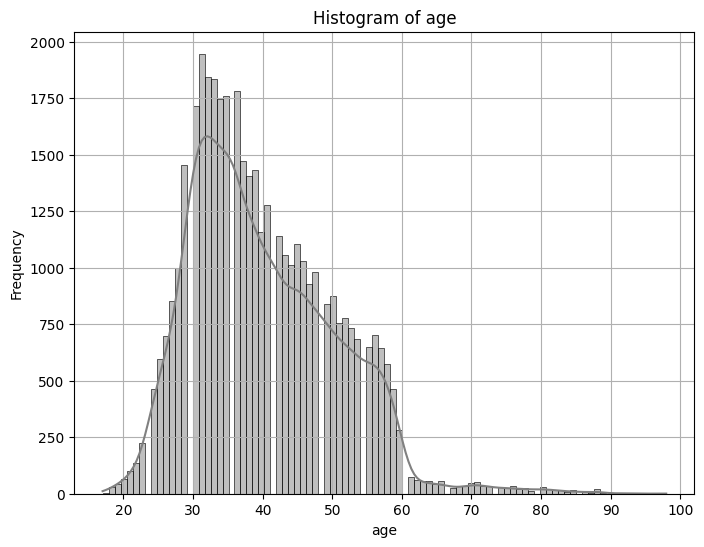

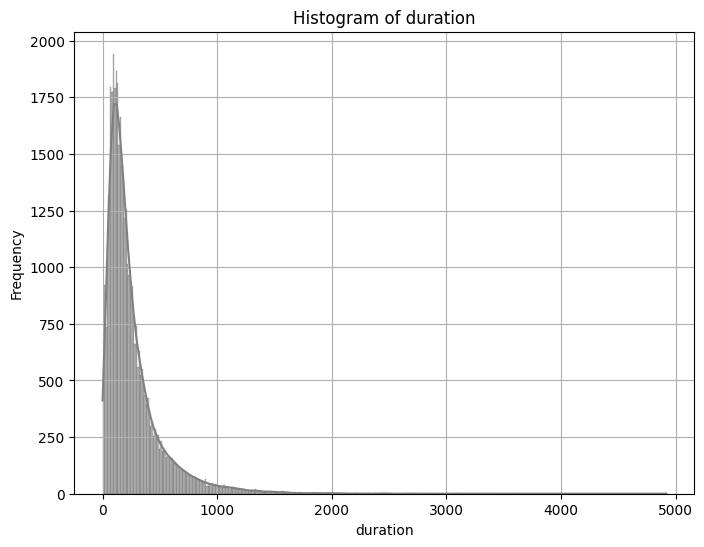

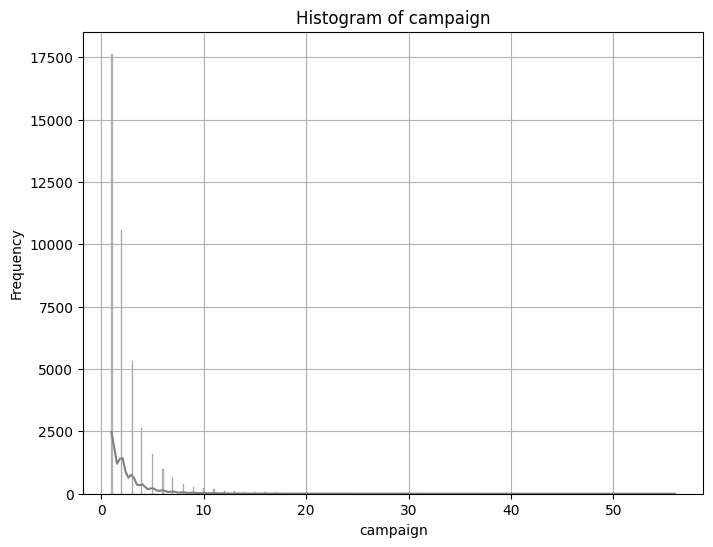

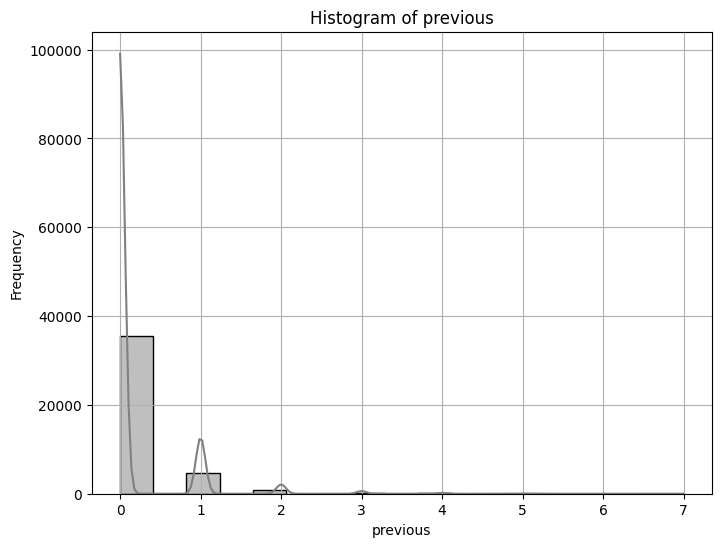

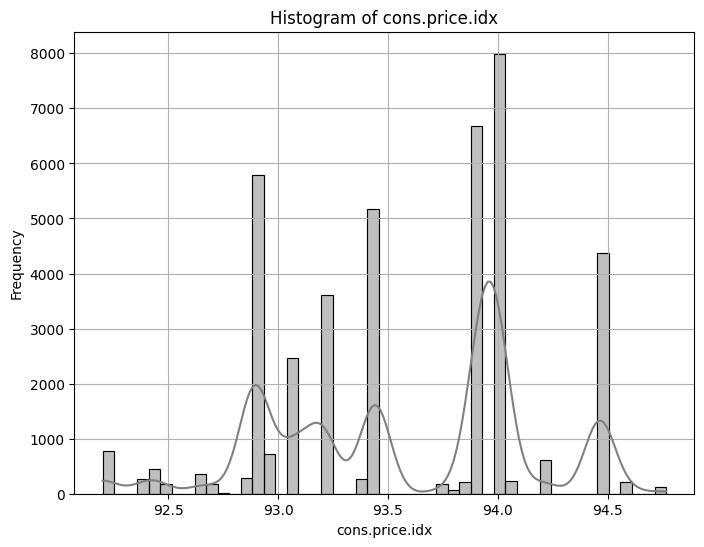

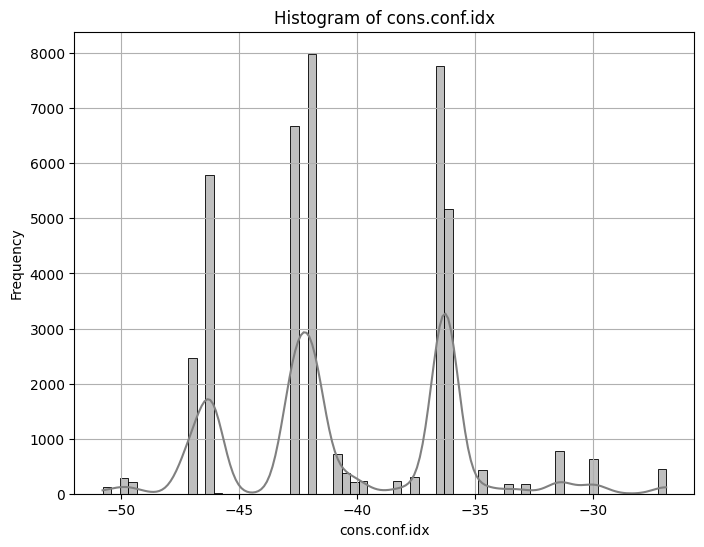

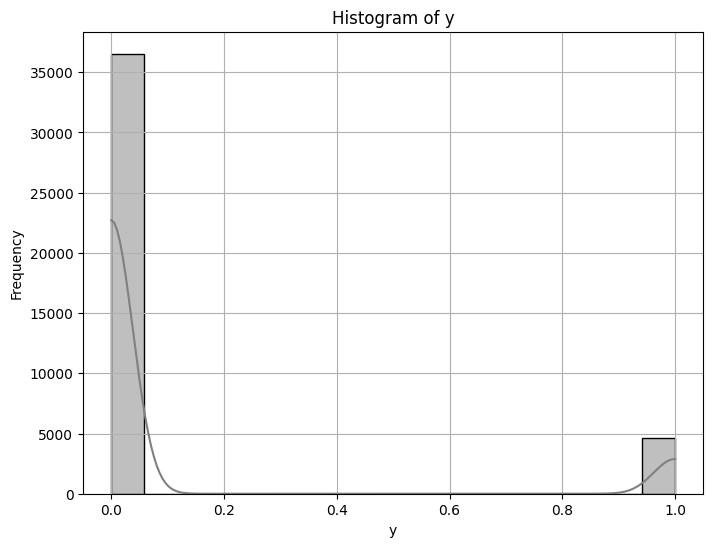

In [ ]:
#Generating histograms for numerical variables
numerical_variables = ['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'y']

for variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[variable], kde=True, color='gray')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.24 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
dataprep 0.4.5 requires pandas<2.0,>=1.1, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
holoviews 1.19.1 requires bokeh>=3.1, but you have bokeh 2.4.3 which is incompatible.
panel 1.4.5 requires bokeh<3.5.0,>=3.4.0

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


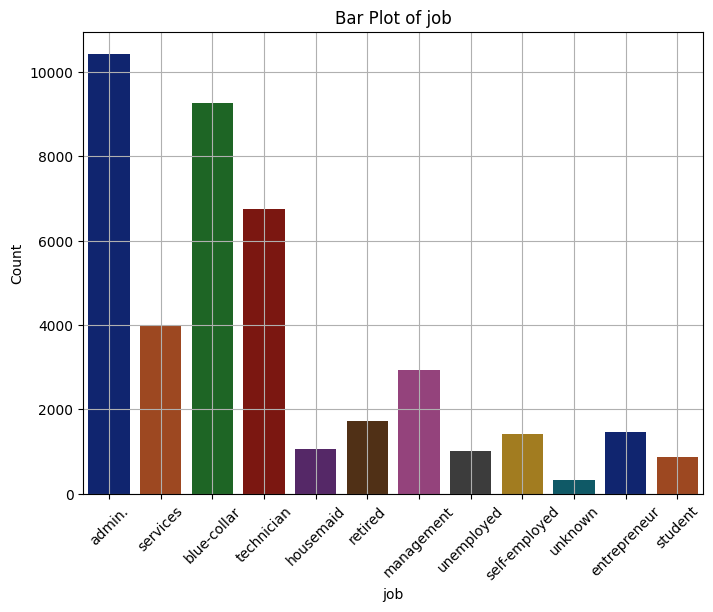

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


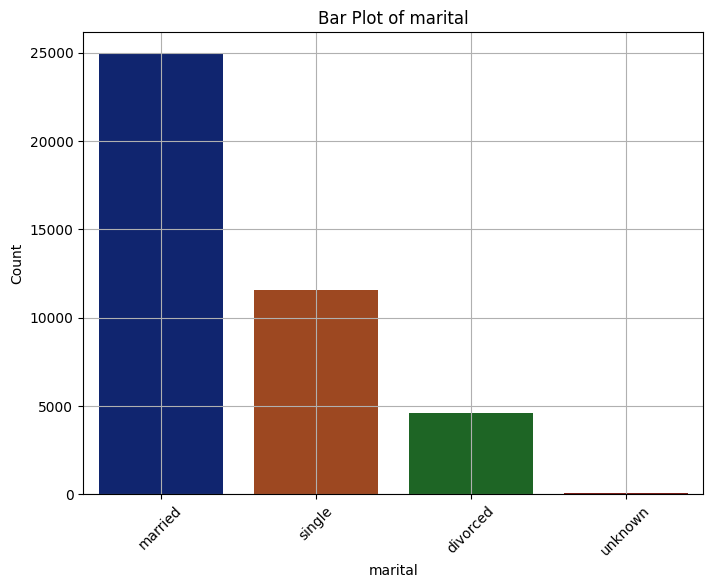

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


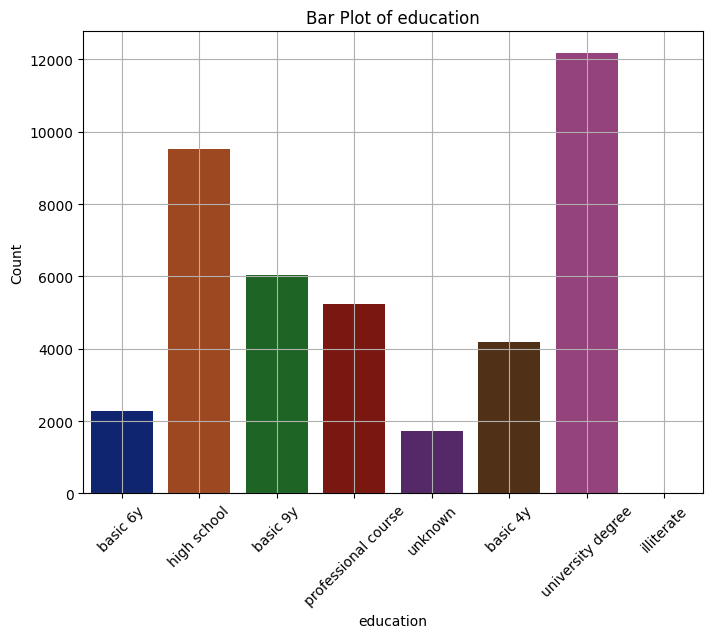

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


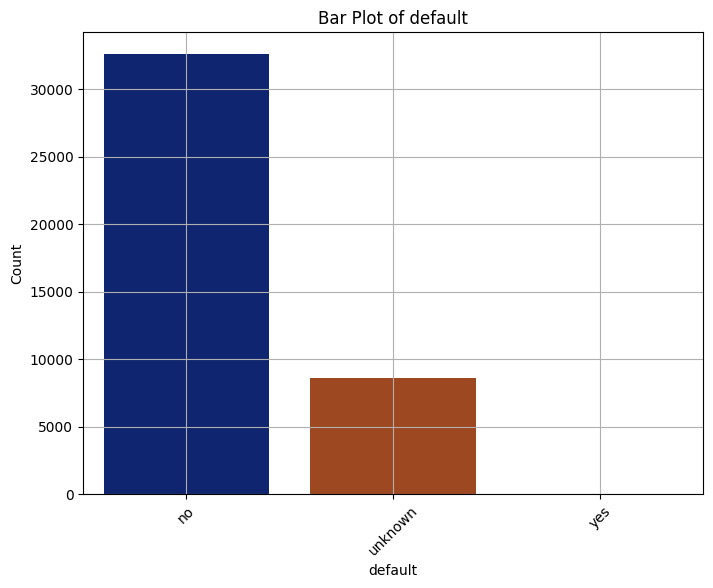

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


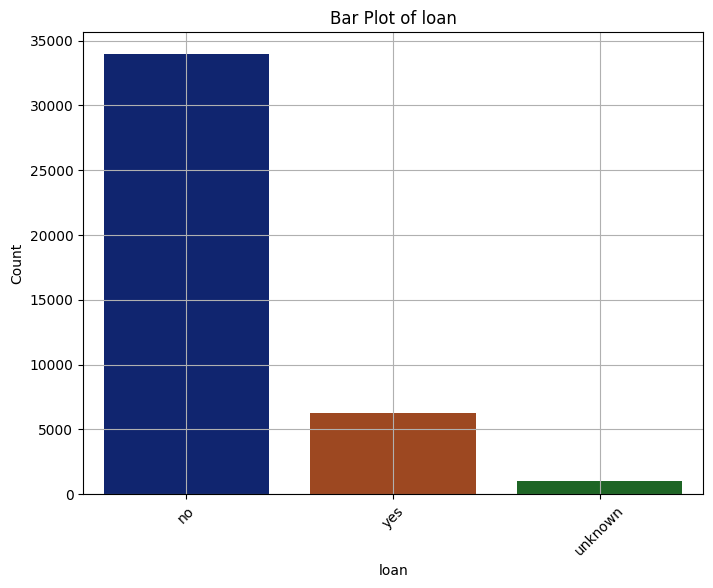

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


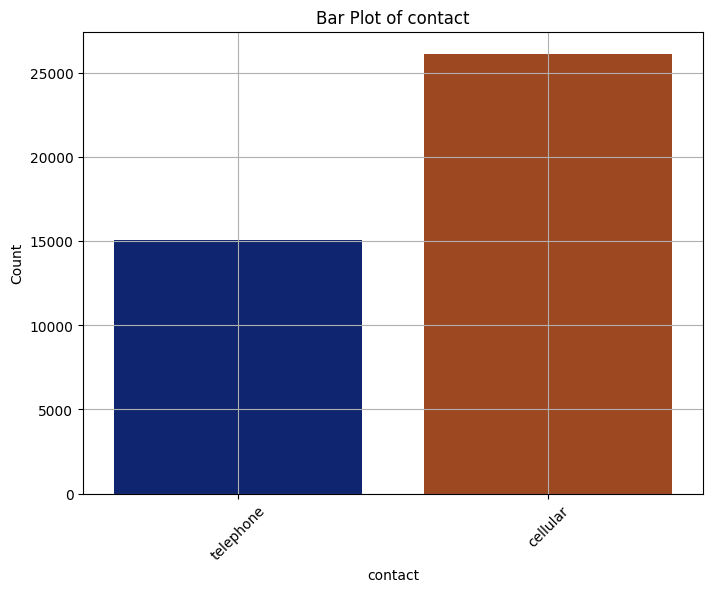

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


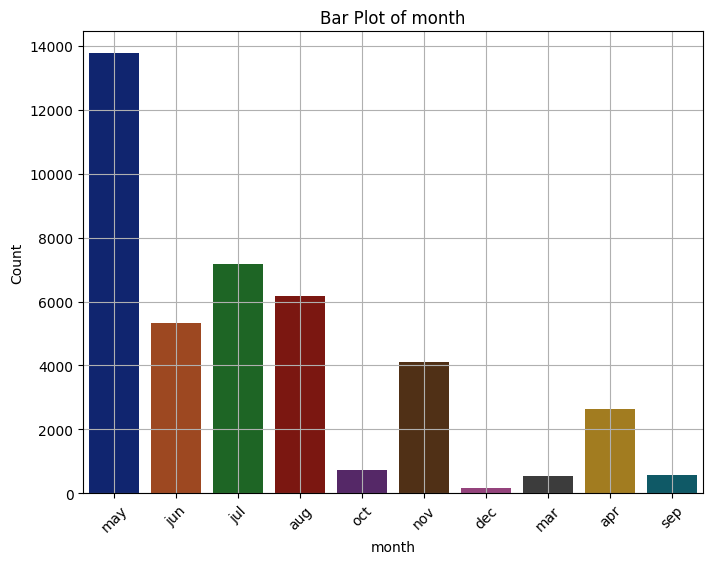

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


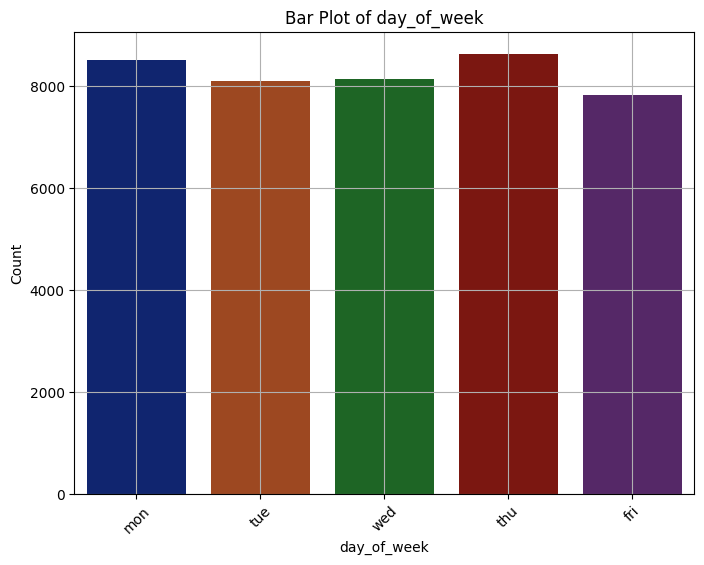

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


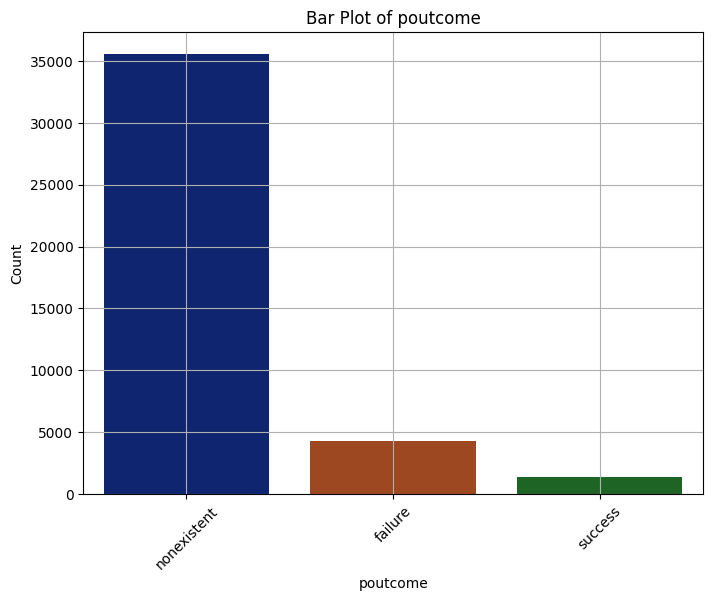

<ipython-input-13-b4276d2c402d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, palette='dark')


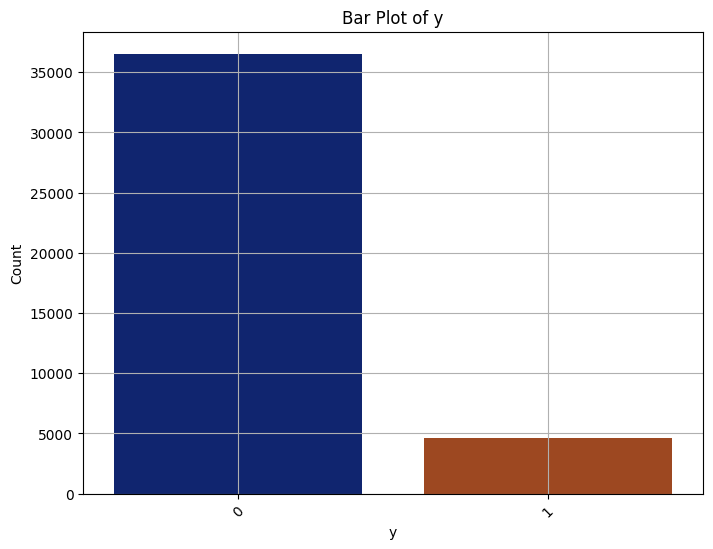

In [ ]:
# Generating bar plots for categorical variables
!pip install --upgrade pandas
!pip install --upgrade seaborn

# List of categorical variables

categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=data, palette='dark')
    plt.title(f'Bar Plot of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### **Step 4: Outlier Detection and Removal**

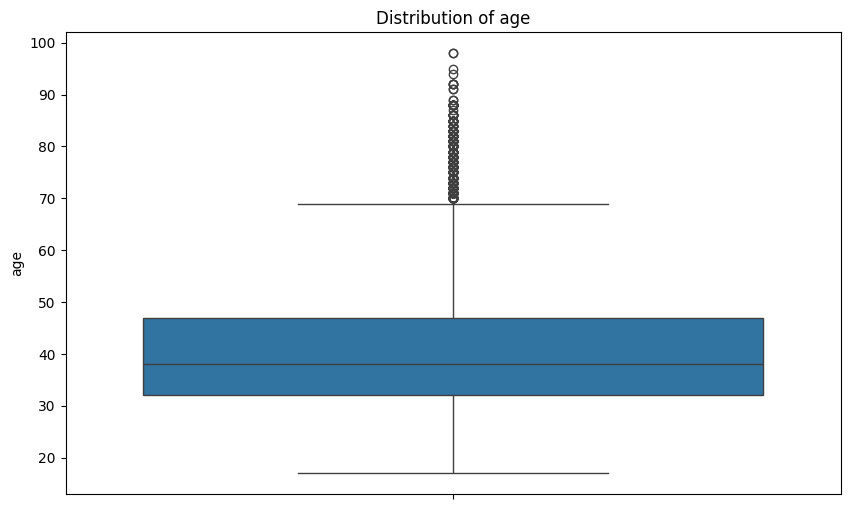

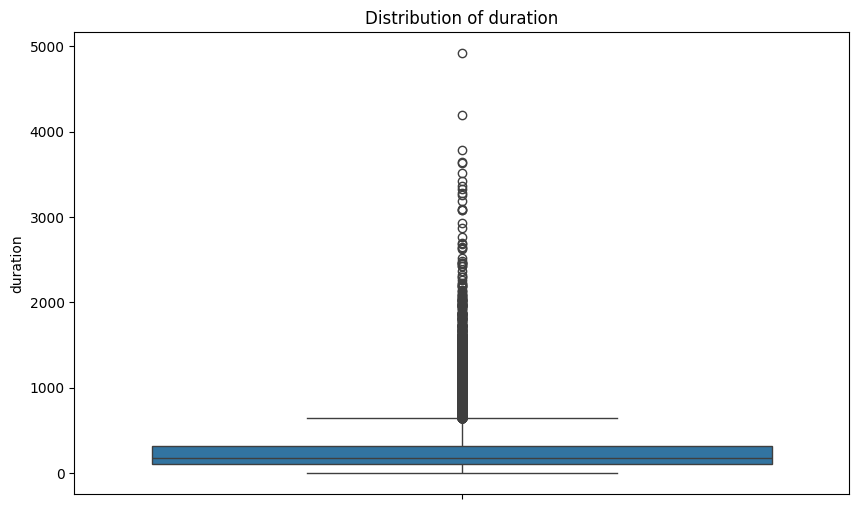

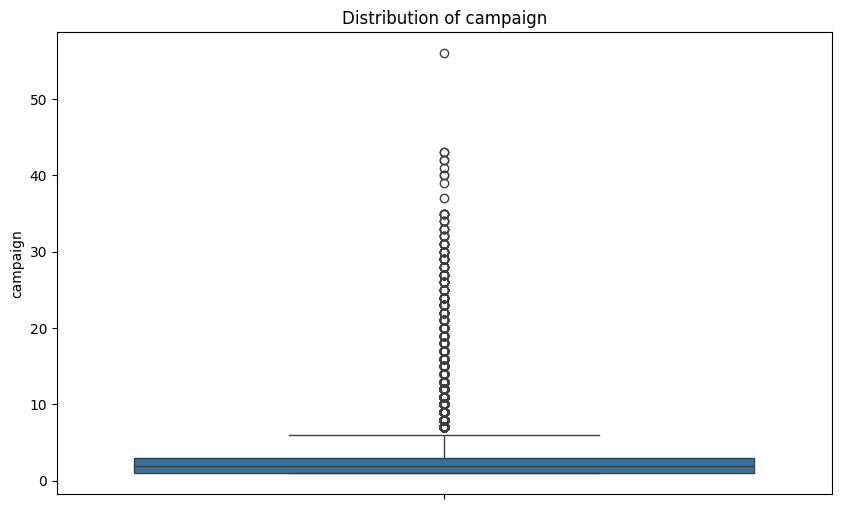

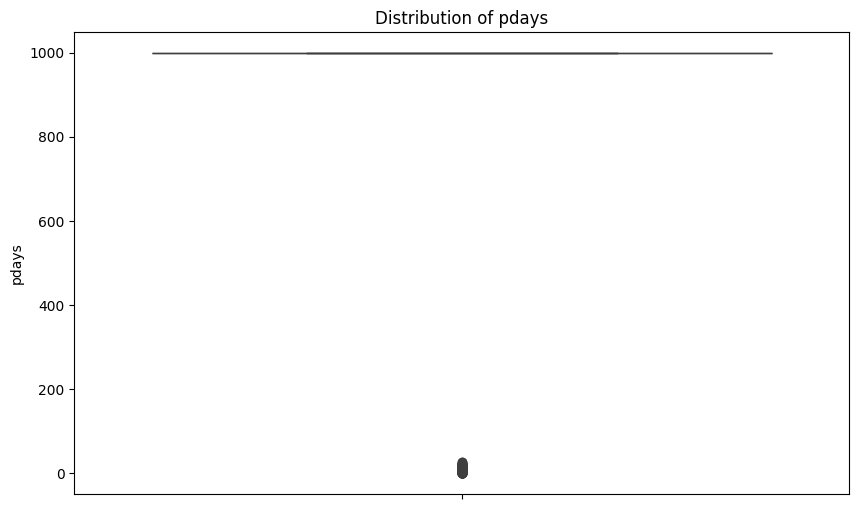

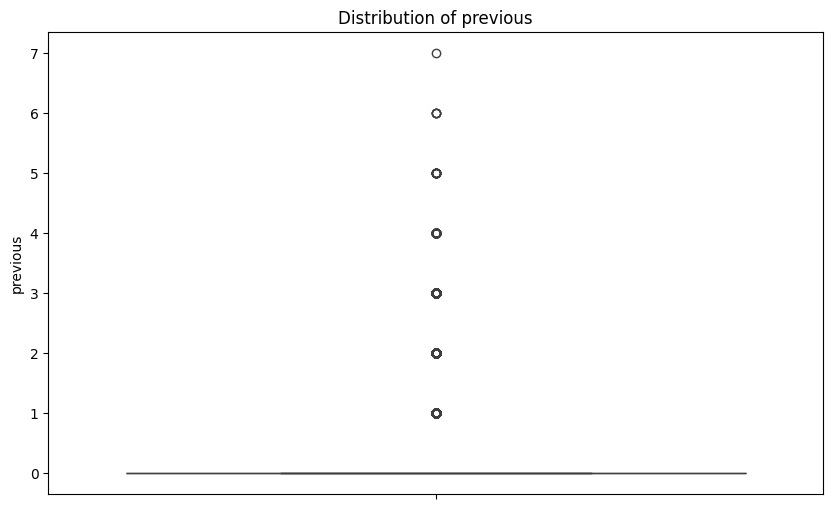

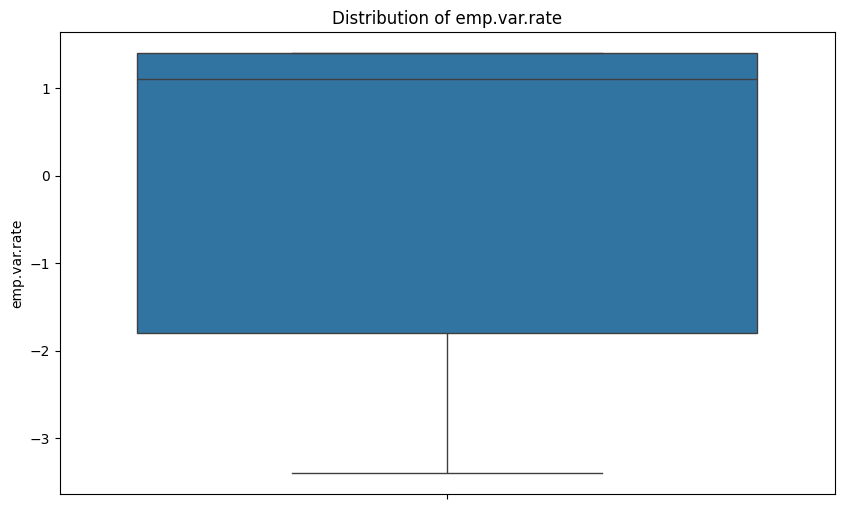

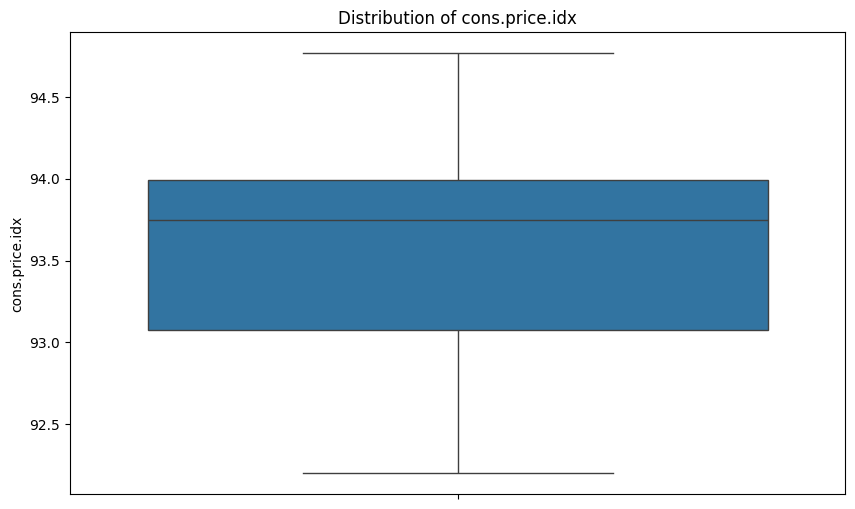

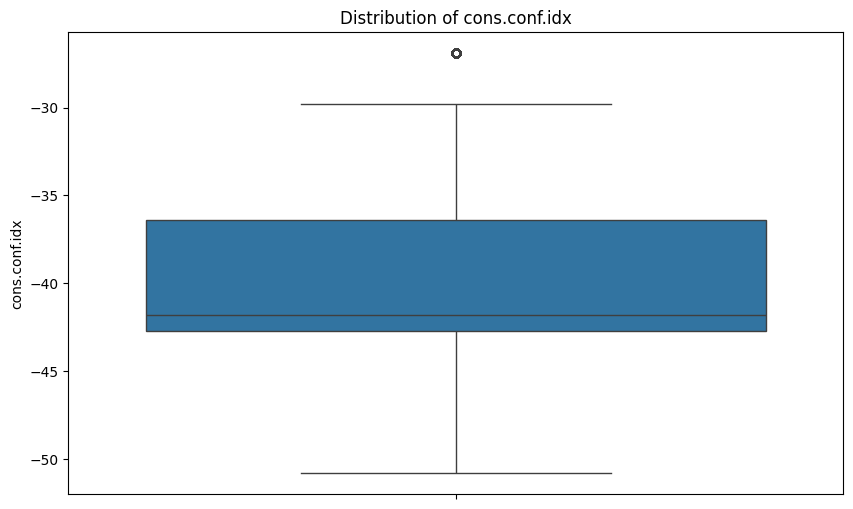

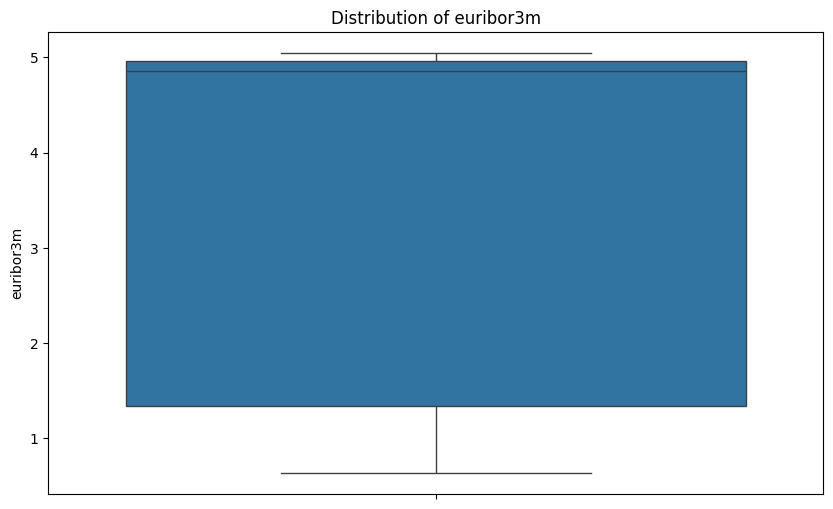

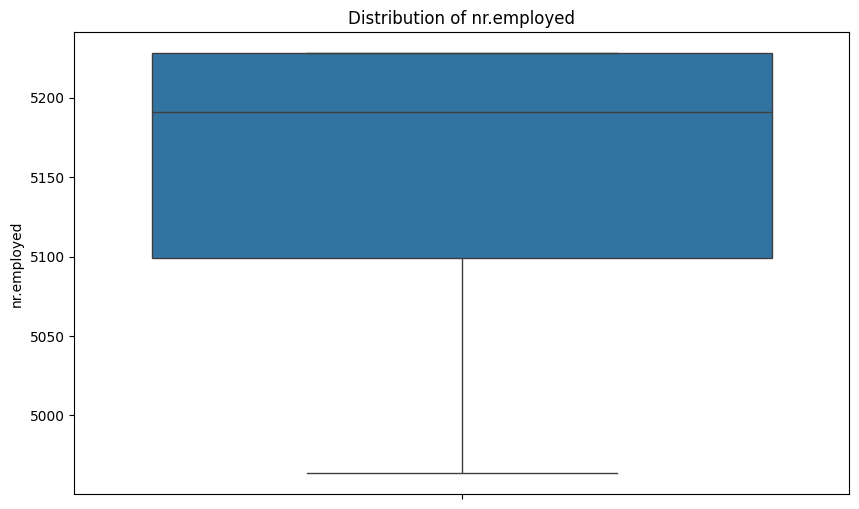

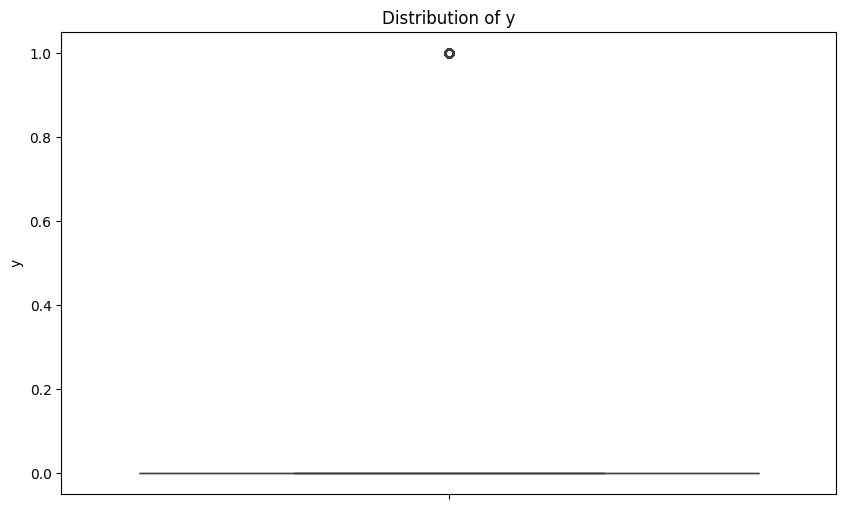

In [ ]:
#Creating boxplots for numerical variables to visualize distributions and detect potential outliers

for column in data.select_dtypes(include=['float64', 'int64']).columns:

    plt.figure(figsize=(10, 6))
    sns.boxplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
#Removing outliers from selected columns based on the IQR method
selected_columns = ['age', 'duration', 'campaign']
for column in selected_columns:

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


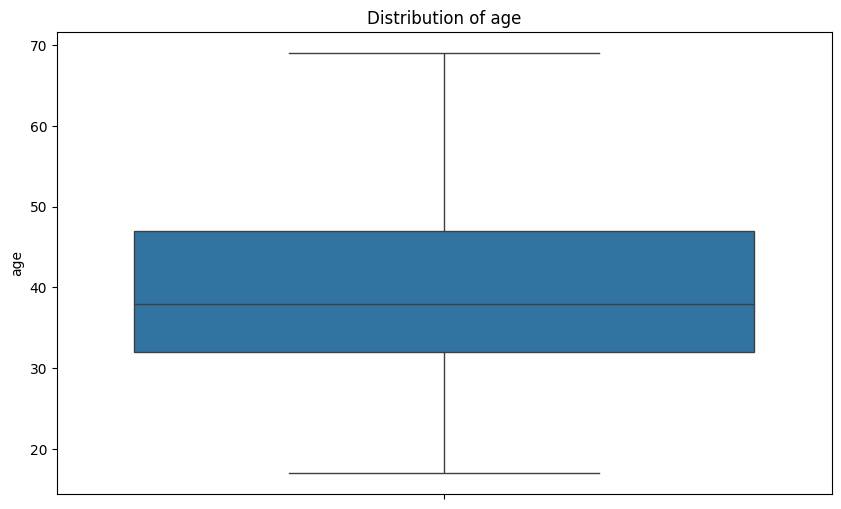

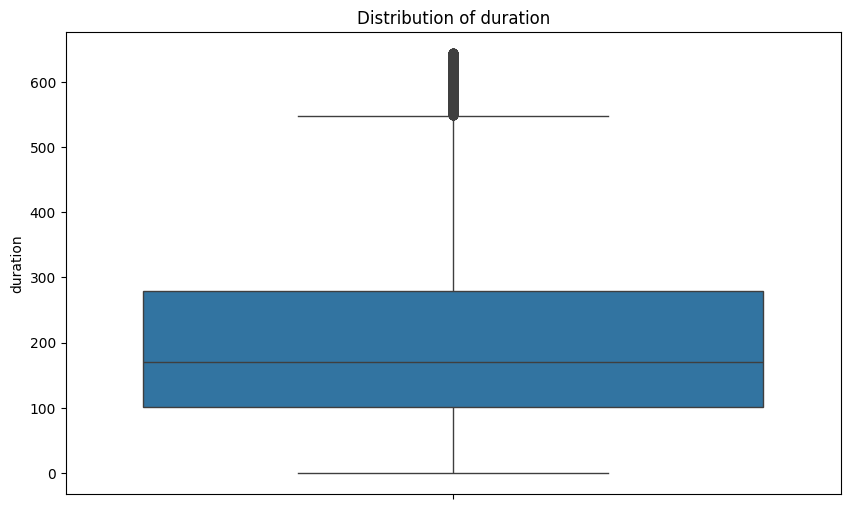

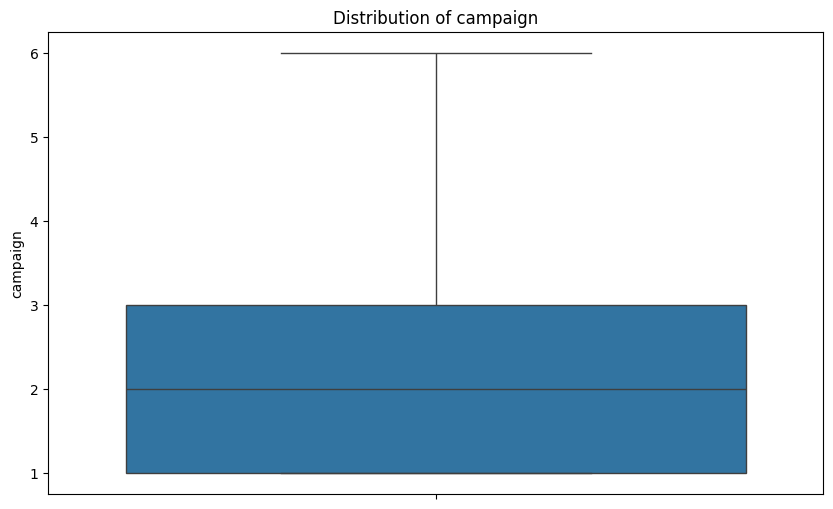

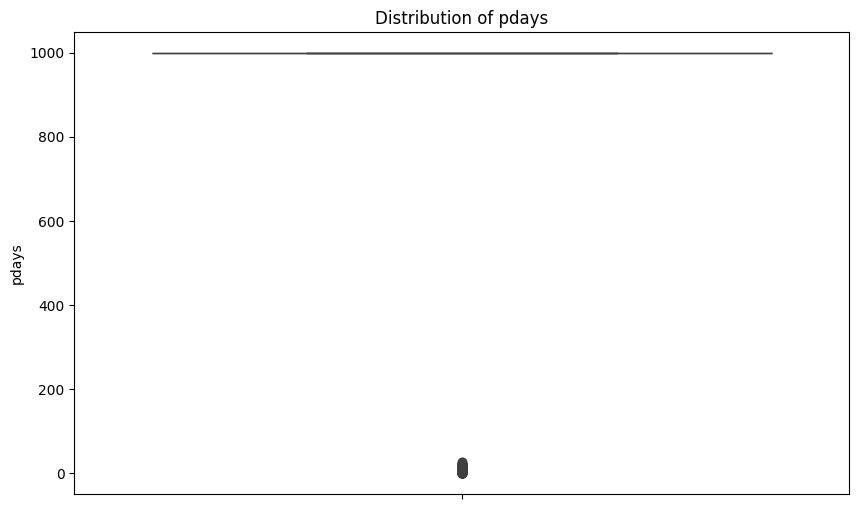

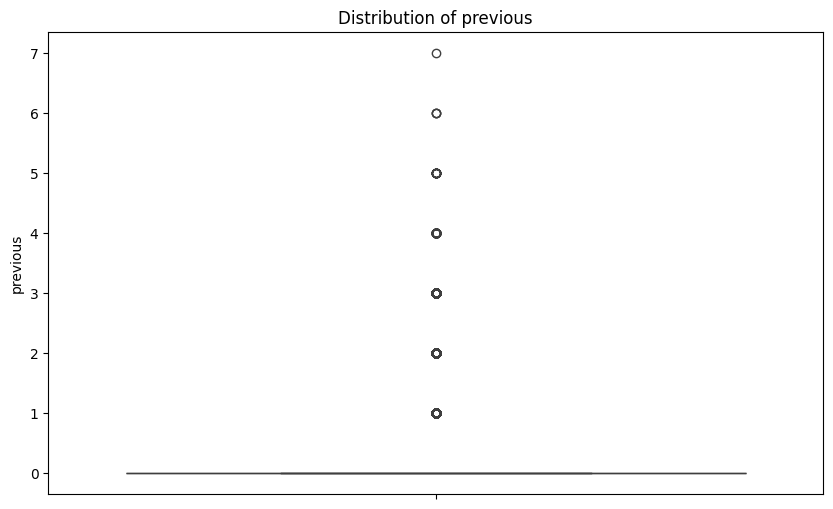

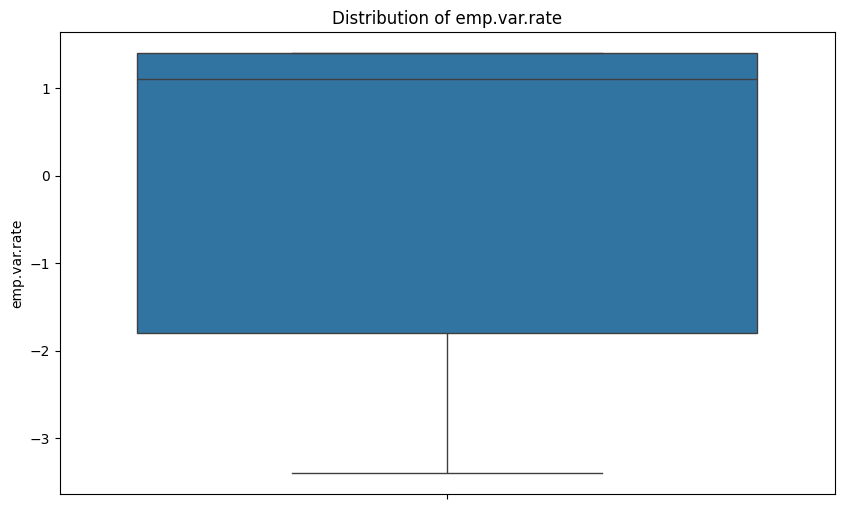

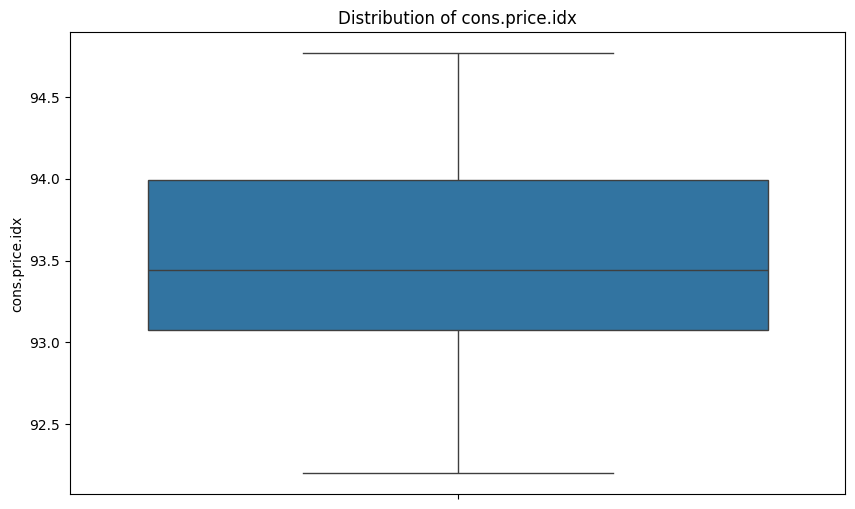

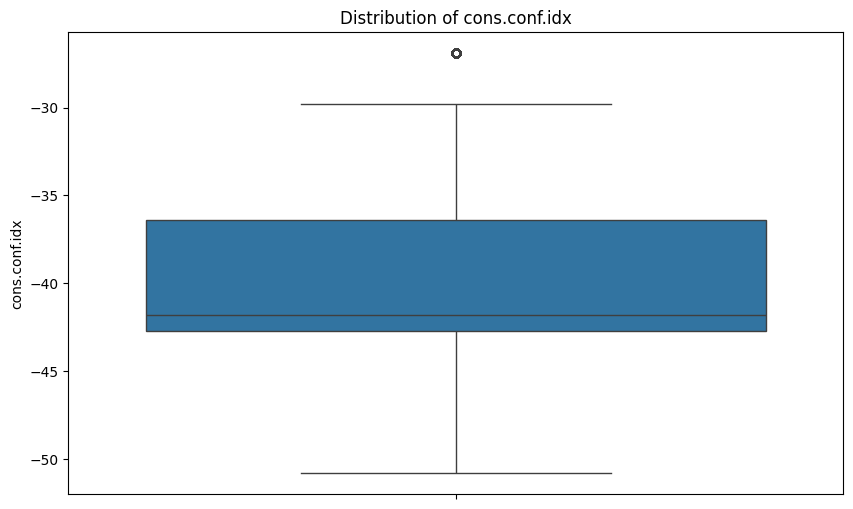

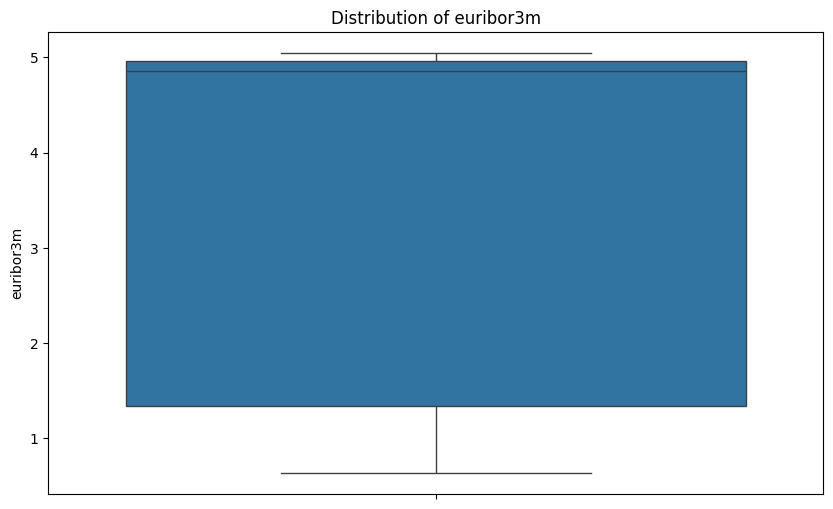

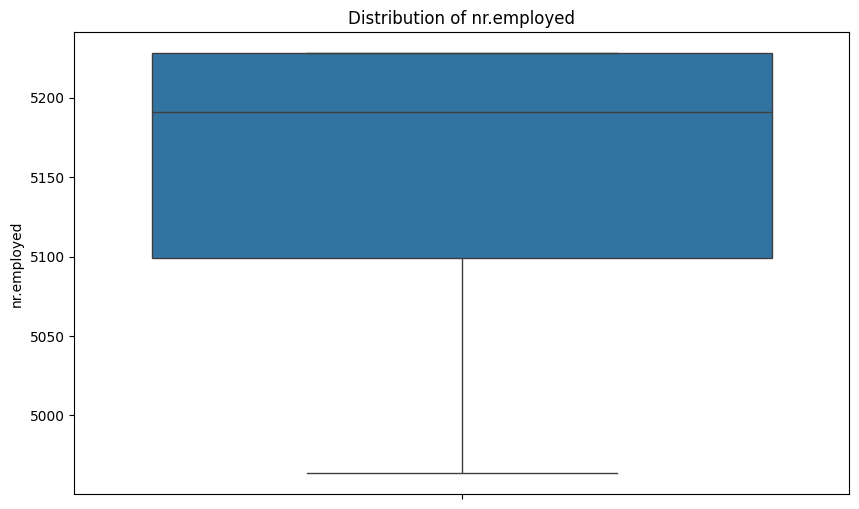

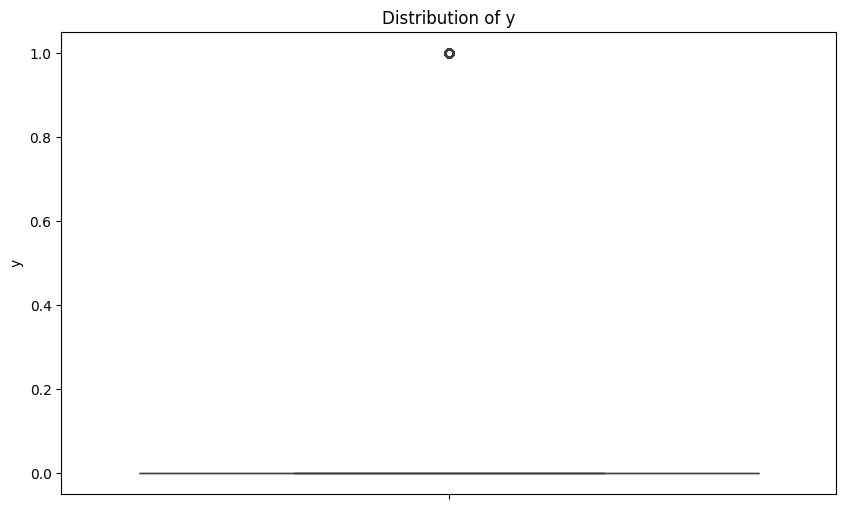

In [ ]:
#Creating boxplots again after removing outliers to see the changes
for column in data.select_dtypes(include=['float64', 'int64']).columns:

    plt.figure(figsize=(10, 6))
    sns.boxplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

### **Step 5: Visualization of Analysis**

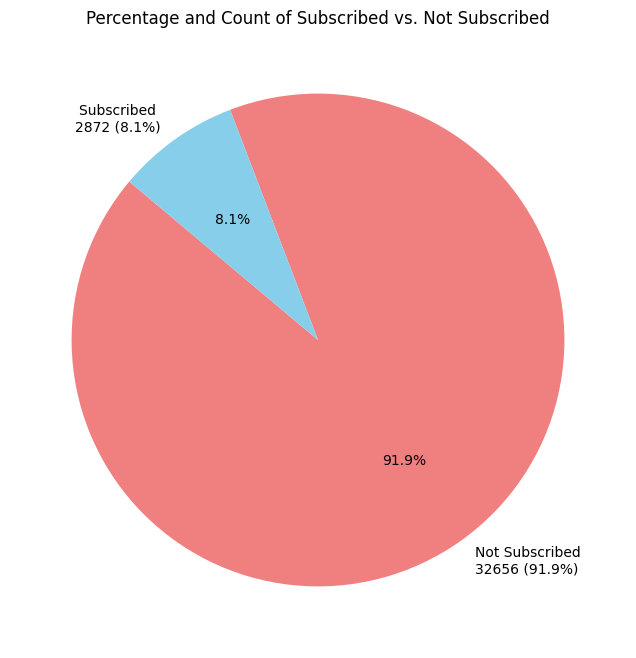

In [ ]:
#Creating a pie chart to visualize the distribution of the target variable 'y' (Subscribed vs. Not Subscribed)
subscription_counts = data['y'].value_counts()
subscription_percentages = data['y'].value_counts(normalize=True) * 100

labels = [f'Not Subscribed \n{subscription_counts[0]} ({subscription_percentages[0]:.1f}%)',
          f'Subscribed \n{subscription_counts[1]} ({subscription_percentages[1]:.1f}%)']

plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])

plt.title('Percentage and Count of Subscribed vs. Not Subscribed')
plt.show()

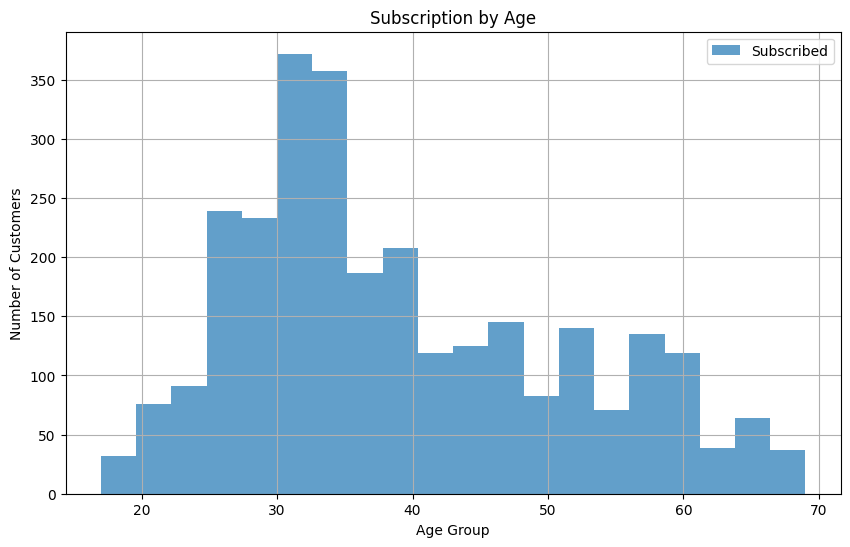

In [ ]:
#Creating histograms to visualize the distribution of age for subscribers
plt.figure(figsize=(10, 6))
plt.hist(data[data['y'] == 1]['age'], bins=20, alpha=0.7, label='Subscribed')
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.title("Subscription by Age")
plt.legend()
plt.grid(True)
plt.show()

The histogram shows that the majority of the subscribers are young aged.

<ipython-input-19-19293e1fb7e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data[data['y'] == 1], palette='colorblind')


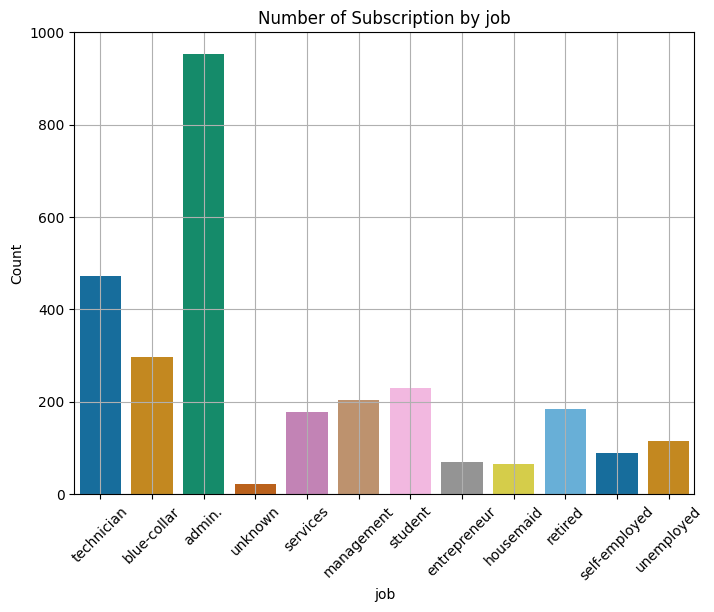

<ipython-input-19-19293e1fb7e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data[data['y'] == 1], palette='colorblind')


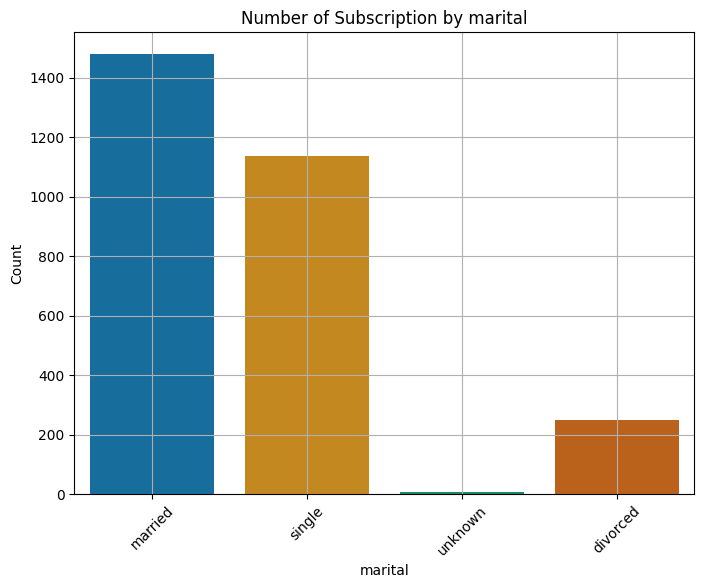

<ipython-input-19-19293e1fb7e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data[data['y'] == 1], palette='colorblind')


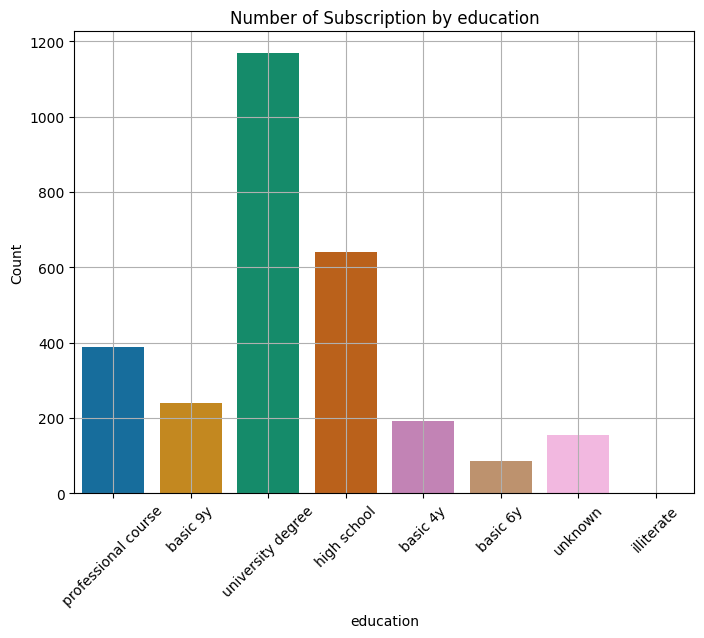

<ipython-input-19-19293e1fb7e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data[data['y'] == 1], palette='colorblind')


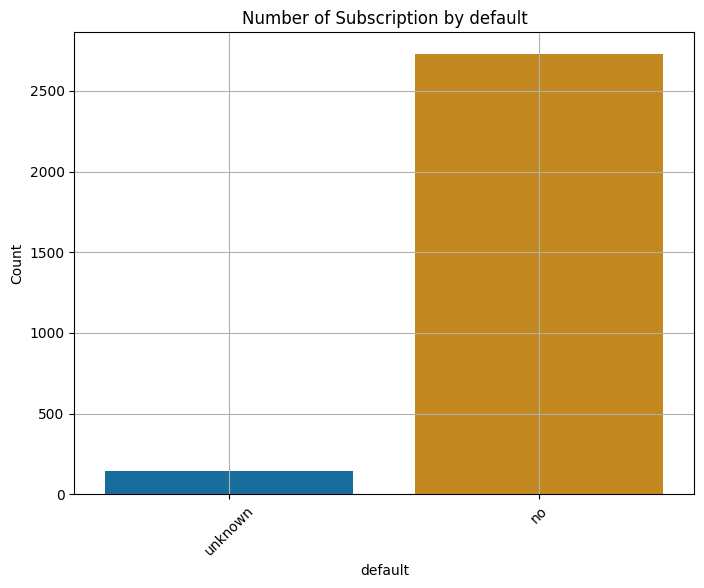

<ipython-input-19-19293e1fb7e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data[data['y'] == 1], palette='colorblind')


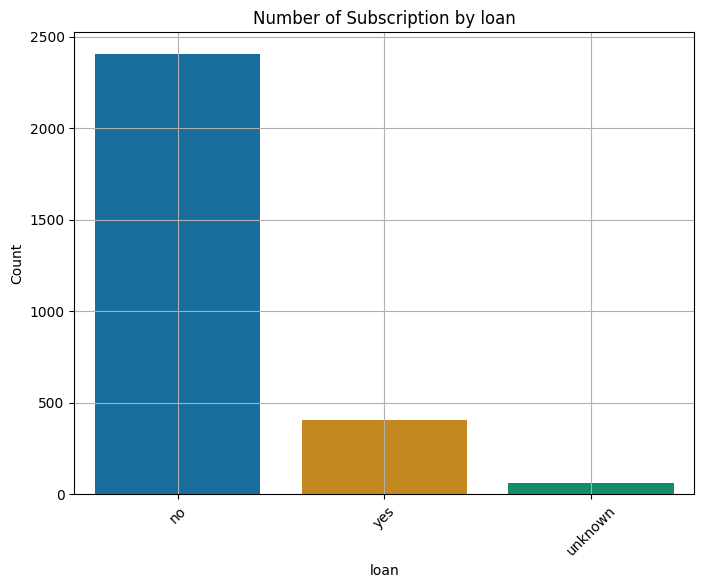

<ipython-input-19-19293e1fb7e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data[data['y'] == 1], palette='colorblind')


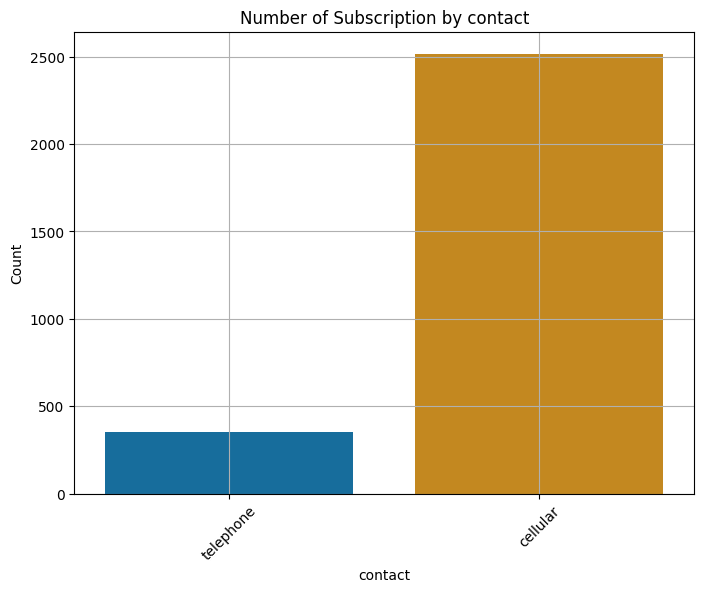

<ipython-input-19-19293e1fb7e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data[data['y'] == 1], palette='colorblind')


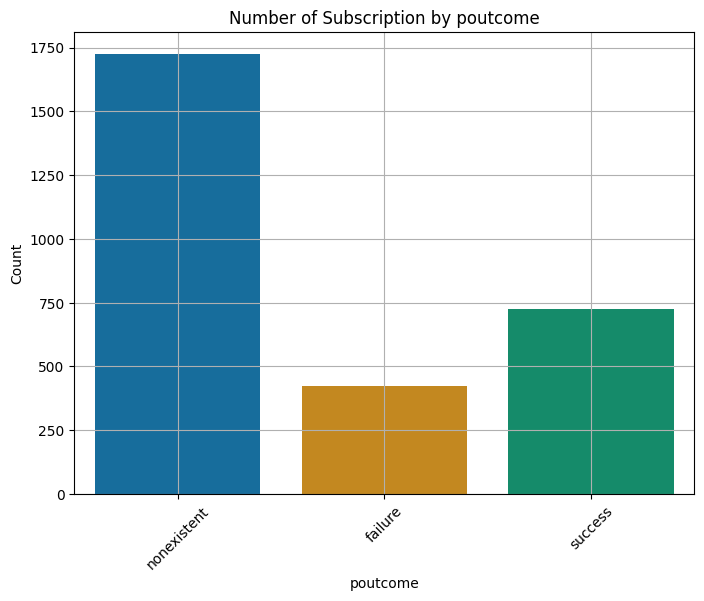

In [ ]:
#Generating bar plots for categorical variables by subscription status (y == 1)
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'poutcome']

for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=data[data['y'] == 1], palette='colorblind')
    plt.title(f'Number of Subscription by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()



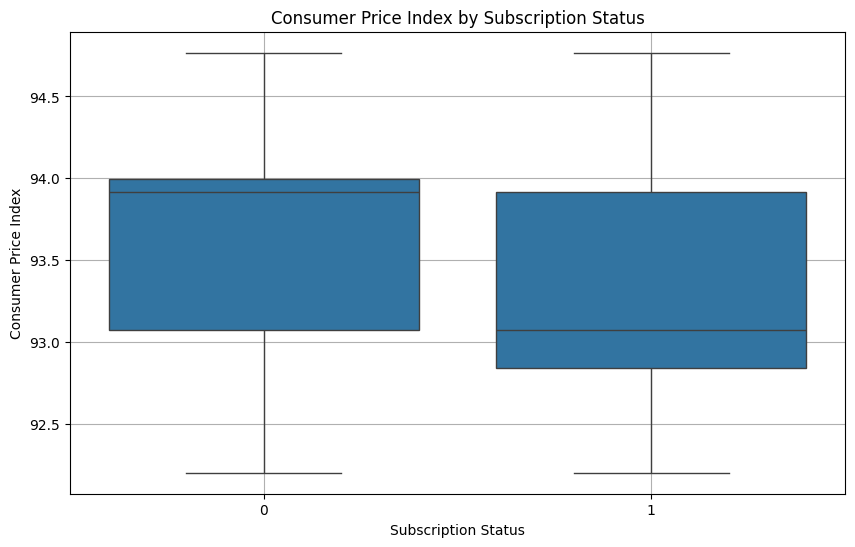

In [ ]:
#Creating boxplots to visualize Consumer Price Index (cons.price.idx) and Consumer Confidence Index (cons.conf.idx) by subscription status (y)
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='cons.price.idx', data=data)
plt.title('Consumer Price Index by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Consumer Price Index')
plt.grid(True)
plt.show()

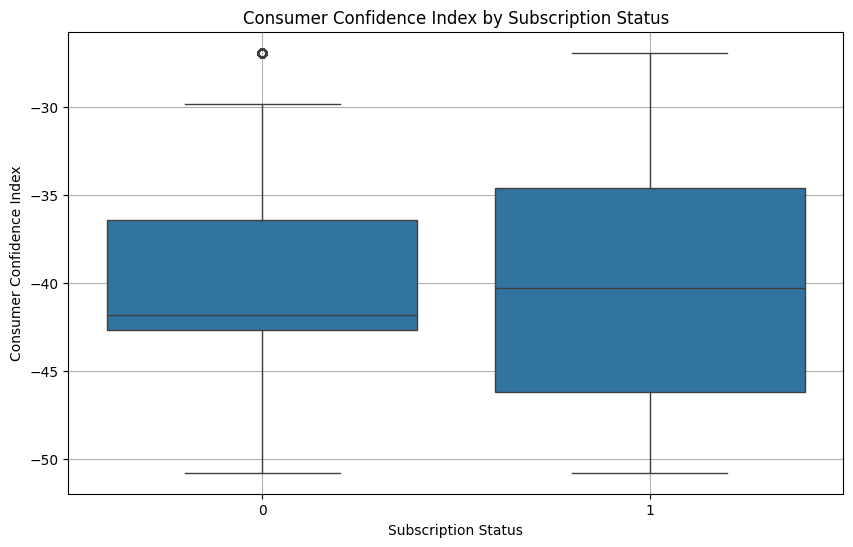

In [ ]:
#Creating boxplots to visualize Consumer Confidence Index (cons.conf.idx) by subscription status (y)
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='cons.conf.idx', data=data)
plt.title('Consumer Confidence Index by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Consumer Confidence Index')
plt.grid(True)
plt.show()

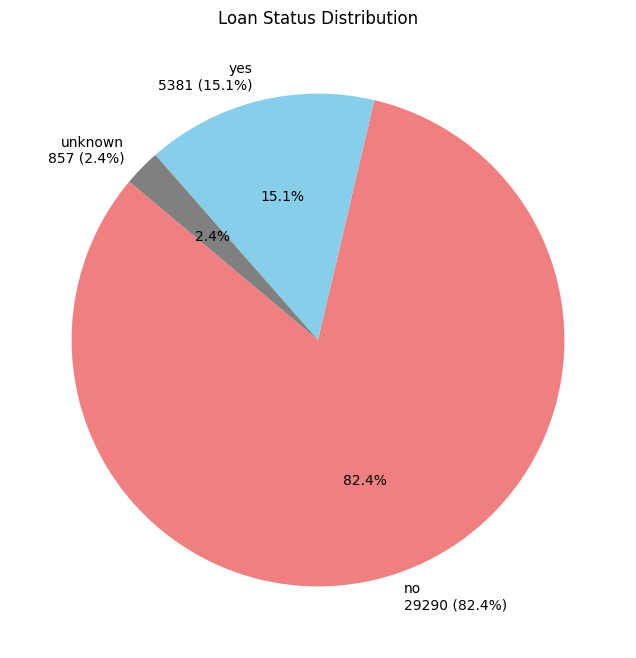

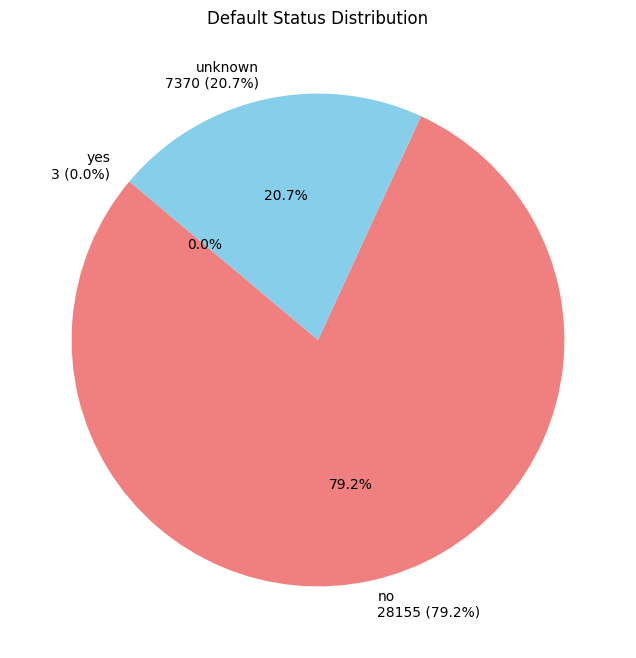

In [ ]:
#Creating pie chart to check loan status of paticipants
loan_counts = data['loan'].value_counts()
loan_percentages = data['loan'].value_counts(normalize=True) * 100

loan_labels = [f'{label}\n{count} ({percentage:.1f}%)' for label, count, percentage in zip(loan_counts.index, loan_counts.values, loan_percentages.values)]

plt.figure(figsize=(8, 8))
plt.pie(loan_counts, labels=loan_labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'grey'])
plt.title('Loan Status Distribution')
plt.show()

# Creating pie chart to check default status of participants
default_counts = data['default'].value_counts()
default_percentages = data['default'].value_counts(normalize=True) * 100

default_labels = [f'{label}\n{count} ({percentage:.1f}%)' for label, count, percentage in zip(default_counts.index, default_counts.values, default_percentages.values)]

plt.figure(figsize=(8, 8))
plt.pie(default_counts, labels=default_labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'grey'])
plt.title('Default Status Distribution')
plt.show()

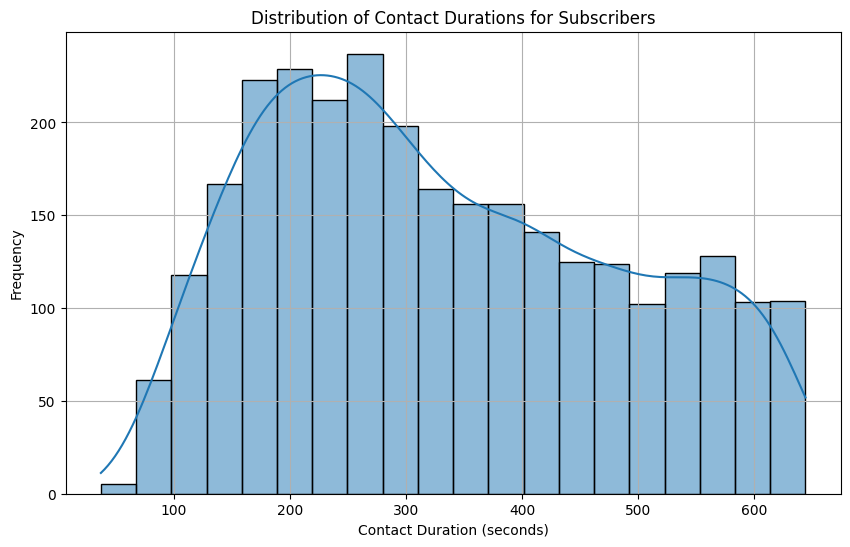

Mean contact duration for subscribers: 333.3708217270195
Mean contact duration for non-subscribers: 195.6468949044586


In [ ]:
#Analyzing distribution of contact durations for subscribers
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['y'] == 1], x='duration', bins=20, kde=True)
plt.title('Distribution of Contact Durations for Subscribers')
plt.xlabel('Contact Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Calculating mean contact duration for subscribers and non-subscribers
mean_duration_subscribers = data[data['y'] == 1]['duration'].mean()
mean_duration_non_subscribers = data[data['y'] == 0]['duration'].mean()

print("Mean contact duration for subscribers:", mean_duration_subscribers)
print("Mean contact duration for non-subscribers:", mean_duration_non_subscribers)

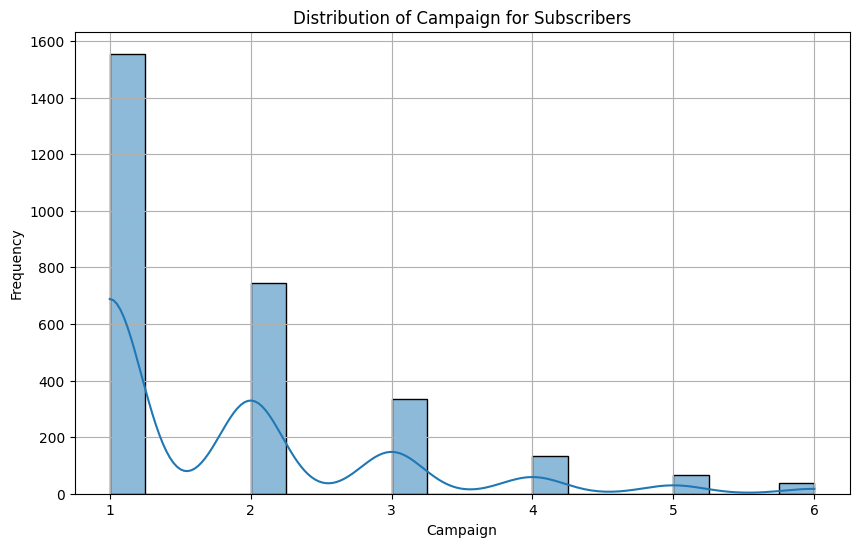

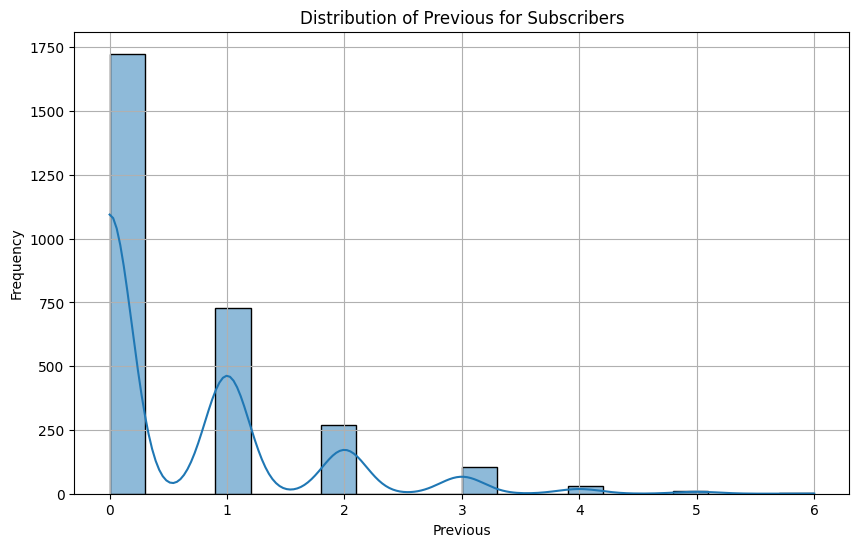

In [ ]:
#distribution of campaign and previous for subscribers
columns = ['campaign', 'previous']

for column in columns:
    plt.figure(figsize=(10, 6))

    sns.histplot(data=data[data['y'] == 1], x=column, bins=20, kde=True)

    plt.title(f'Distribution of {column.capitalize()} for Subscribers')
    plt.xlabel(f'{column.capitalize()}')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

<ipython-input-25-d70d28db746c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_subscribers = subscribers.groupby('month').size()


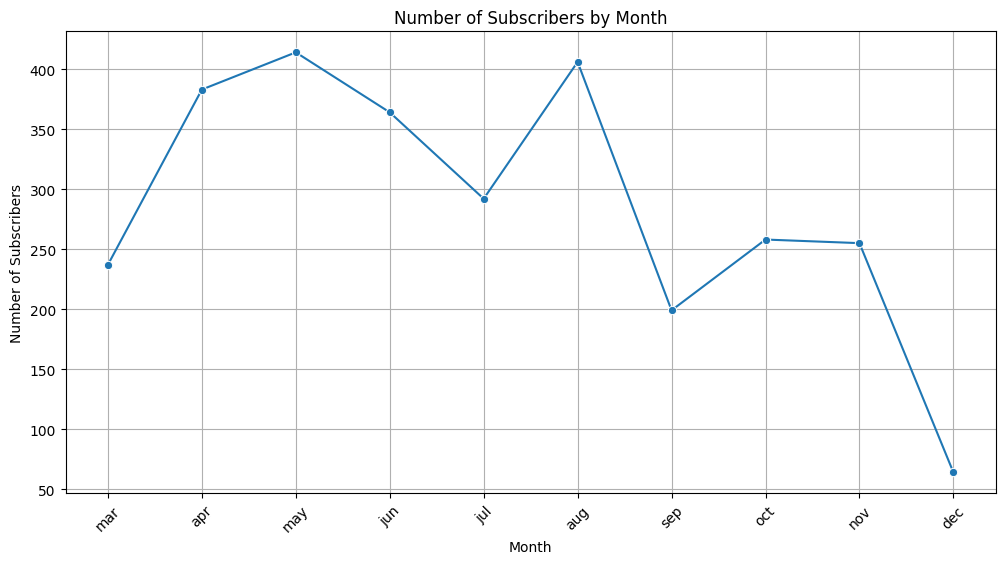

In [ ]:
#line chart for month-wise subscribers
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

subscribers = data[data['y'] == 1]

monthly_subscribers = subscribers.groupby('month').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_subscribers.index, y=monthly_subscribers.values, marker='o')
plt.title('Number of Subscribers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<ipython-input-26-483312092e47>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  week_subscribers = subscribers.groupby('day_of_week').size()


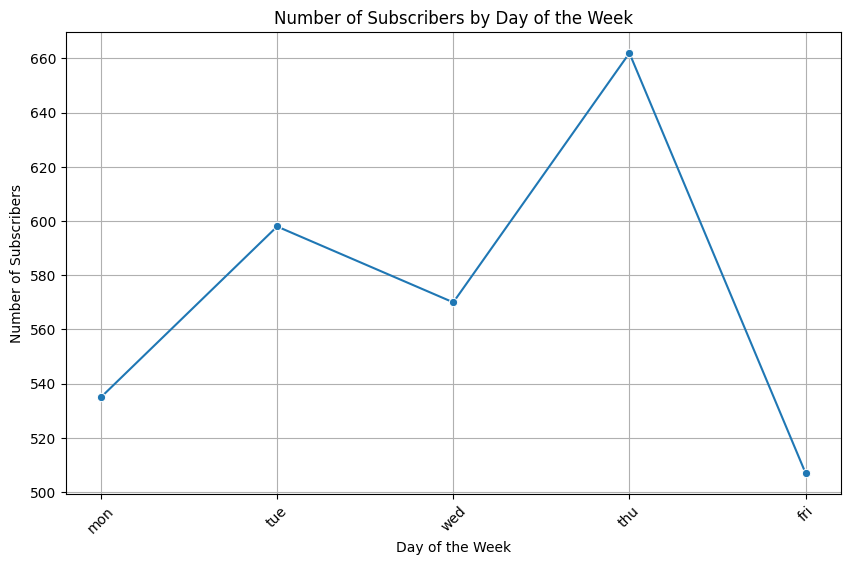

In [ ]:
#line chart for weekdays-wise subscribers
week_order = ['mon', 'tue', 'wed', 'thu', 'fri']
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=week_order, ordered=True)

# Filter the data to get subscribers only (y == 1 or y == 'yes')
subscribers = data[data['y'] == 1]

# Group by 'day_of_week' and count the number of subscribers for each day
week_subscribers = subscribers.groupby('day_of_week').size()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=week_subscribers.index, y=week_subscribers.values, marker='o')
plt.title('Number of Subscribers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Subscribers')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [ ]:
#checking correlation between categorical variables through Chi-square test

from scipy.stats import chi2_contingency

# Get categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create empty DataFrame for results
chi_square_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Perform chi-square test for each pair of variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            chi_square_results.loc[col1, col2] = '-'
        else:
            # Create contingency table
            contingency = pd.crosstab(data[col1], data[col2])

            # Perform chi-square test
            chi2, p_val, dof, expected = chi2_contingency(contingency)

            # Format the result string
            result = f"Chi2: {chi2:.2f}, p: {p_val:.3f}"

            # Store in results DataFrame
            chi_square_results.loc[col1, col2] = result

# Display results
print(chi_square_results)


                                job                  marital  \
job                               -  Chi2: 3542.51, p: 0.000   
marital     Chi2: 3542.51, p: 0.000                        -   
education  Chi2: 32169.92, p: 0.000  Chi2: 1483.87, p: 0.000   
default     Chi2: 1744.72, p: 0.000   Chi2: 663.17, p: 0.000   
housing       Chi2: 28.06, p: 0.174    Chi2: 11.41, p: 0.076   
loan          Chi2: 27.50, p: 0.193     Chi2: 4.15, p: 0.657   
contact      Chi2: 537.26, p: 0.000   Chi2: 226.20, p: 0.000   
poutcome     Chi2: 621.41, p: 0.000   Chi2: 134.93, p: 0.000   

                          education                  default  \
job        Chi2: 32169.92, p: 0.000  Chi2: 1744.72, p: 0.000   
marital     Chi2: 1483.87, p: 0.000   Chi2: 663.17, p: 0.000   
education                         -  Chi2: 2204.14, p: 0.000   
default     Chi2: 2204.14, p: 0.000                        -   
housing       Chi2: 26.23, p: 0.024    Chi2: 10.01, p: 0.040   
loan          Chi2: 13.98, p: 0.451    

From the outcome of the test we can see that most of the association has strong statistical significance whereas few association has P valuesue higher than the thershold which mean those association doesn't influence each other.

## Step 6: Feature Selection

In [ ]:
#Approach 1: Correlation analysis of numerical features

# Select only numerical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
# Calculate the correlation matrix and focus on the correlation with 'y'

correlation_matrix = data[numerical_features].corr()
correlation_with_target = correlation_matrix['y'].drop('y').sort_values(ascending=False)
print("Correlation of numerical features with 'y':\n",correlation_with_target)

Correlation of numerical features with 'y':
 duration          0.268015
previous          0.265802
cons.conf.idx     0.073936
age              -0.016576
campaign         -0.058294
cons.price.idx   -0.159754
emp.var.rate     -0.346134
euribor3m        -0.352405
pdays            -0.379199
nr.employed      -0.410914
Name: y, dtype: float64


Here we can see other than 'duration', 'previous' and 'cons.conf.idx' column, rest of the features are not significantly correlated to target column. But we are going to consider some of the features as they provide significant insights about customers.

In [ ]:
#Approach 2: Chi-square test for categorical variables

from sklearn.feature_selection import chi2



# Separate features and target
X = data.drop(columns=['y'])
y = data['y']

# Perform Chi-square test for categorical features
categorical_features = X.select_dtypes(include='object').columns
chi2_results = {}

for col in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(X[col], y)

    # Perform Chi-square test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

    # Store the results
    chi2_results[col] = p_val

# Convert results to a DataFrame for better readability
chi2_results_df = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'P-value'])
chi2_results_df = chi2_results_df.sort_values(by='P-value')

print("Chi-square test results for categorical features:\n", chi2_results_df)


Chi-square test results for categorical features:
      Feature        P-value
7   poutcome   0.000000e+00
0        job  3.858182e-194
6    contact  4.610903e-172
3    default  1.794330e-102
2  education   2.110189e-60
1    marital   2.057592e-42
4    housing   4.284168e-02
5       loan   1.961268e-01


The Chi-square test results indicate the statistical significance of the association between each categorical feature and the target variable.

In [ ]:
#final feature list
features_list=['duration', 'previous', 'cons.conf.idx', 'age', 'campaign', 'cons.price.idx', 'emp.var.rate', 'marital', 'job', 'education', 'default', 'loan', 'contact', 'housing', 'poutcome', 'y']

In [ ]:
#copy dataset
df_copy=data[features_list].copy()
df_copy.head()

duration  previous  cons.conf.idx  age  campaign  cons.price.idx  \
0       151         0          -36.4   40         1          93.994   
1       307         0          -36.4   56         1          93.994   
2       198         0          -36.4   45         1          93.994   
3       139         0          -36.4   59         1          93.994   
4       217         0          -36.4   41         1          93.994   

   emp.var.rate  marital          job            education  default loan  \
0           1.1  married       admin.             basic 6y       no   no   
1           1.1  married     services          high school       no  yes   
2           1.1  married     services             basic 9y  unknown   no   
3           1.1  married       admin.  professional course       no   no   
4           1.1  married  blue-collar              unknown  unknown   no   

     contact housing     poutcome  y  
0  telephone      no  nonexistent  0  
1  telephone      no  nonexistent  0  
2  telephone      no  nonexistent  0  
3  telephone      no  nonexistent  0  
4  telephone      no  nonexistent  0

## Step 7: Data preparation for modeling and model implementation

---



In [ ]:
# Encoding categorical columns

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoded_data = df_copy.copy()
categorical_cols = ['marital', 'job', 'education', 'default', 'loan', 'contact', 'housing', 'poutcome']

# Using Label Encoding for simplicity, but One-Hot Encoding could also be used
for col in categorical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(data[col])

encoded_data.head()

duration  previous  cons.conf.idx  age  campaign  cons.price.idx  \
0       151         0          -36.4   40         1          93.994   
1       307         0          -36.4   56         1          93.994   
2       198         0          -36.4   45         1          93.994   
3       139         0          -36.4   59         1          93.994   
4       217         0          -36.4   41         1          93.994   

   emp.var.rate  marital  job  education  default  loan  contact  housing  \
0           1.1        1    0          1        0     0        1        0   
1           1.1        1    7          3        0     2        1        0   
2           1.1        1    7          2        1     0        1        0   
3           1.1        1    0          5        0     0        1        0   
4           1.1        1    1          7        1     0        1        0   

   poutcome  y  
0         1  0  
1         1  0  
2         1  0  
3         1  0  
4         1  0

categorical columns were encoded successfully.

In [ ]:
# Spliting the dataset

from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = encoded_data.drop(columns=['y'])
y = encoded_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Dataset was split between test and train dataset with a test size of 0.3.

## Parametric Model - Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 800x600 with 0 Axes>

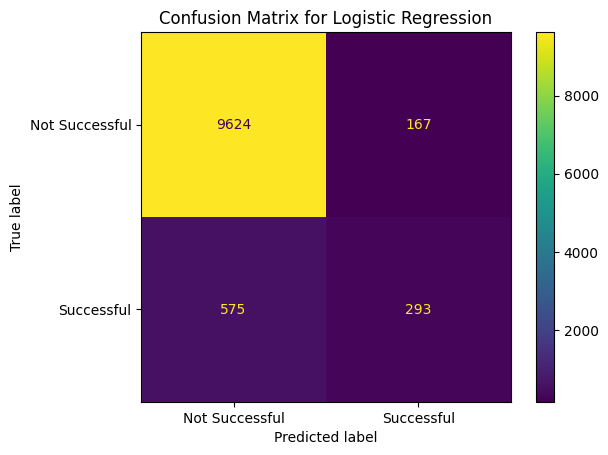

Logistic Regression Accuracy: 0.9303874659911812
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      9791
           1       0.64      0.34      0.44       868

    accuracy                           0.93     10659
   macro avg       0.79      0.66      0.70     10659
weighted avg       0.92      0.93      0.92     10659

ROC-AUC Score: 0.6602505616227071


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Compute confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_log_reg, display_labels=['Not Successful', 'Successful']).plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_log_reg))


The Logistic Regression model achieved a high overall accuracy of 93%, effectively identifying non-successful campaigns. However, it shows limitations in predicting successful campaigns, with a lower recall of 34% and a moderate ROC-AUC score of 0.66. While precision for successful predictions is 64%, the F1-score of 0.44 suggests a need for improvement in balancing precision and recall for campaign success. Addressing this could involve strategies like adjusting thresholds or using resampling techniques to improve the model's ability to capture true campaign responses. We can further Compare these results with the non-parametric models to determine which performs better for predicting campaign success.

## Non-Parametric Model - Decision Tree

<Figure size 800x600 with 0 Axes>

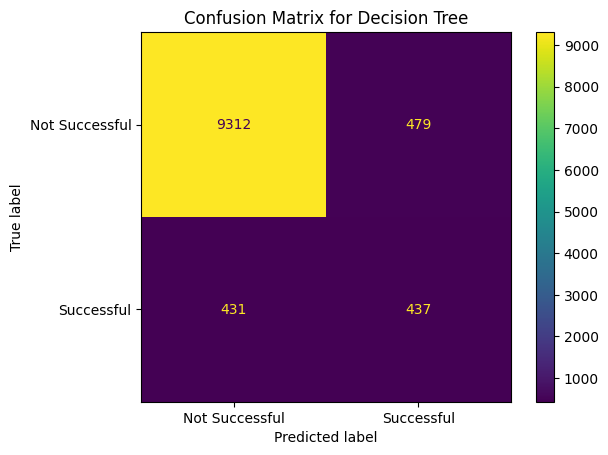

Decision Tree Accuracy: 0.9146261375363542
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      9791
           1       0.48      0.50      0.49       868

    accuracy                           0.91     10659
   macro avg       0.72      0.73      0.72     10659
weighted avg       0.92      0.91      0.92     10659

ROC-AUC Score: 0.7272668706848715


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)

# Compute confusion matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_tree, display_labels=['Not Successful', 'Successful']).plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_tree))


The Decision Tree model achieved an accuracy of 91%, with strong performance in identifying non-successful campaigns. It has a precision of 96% and recall of 95% for the non-successful class, but for successful campaigns, the precision and recall are both lower at 48% and 50%, respectively, resulting in an F1-score of 0.49. The ROC-AUC score of 0.73 suggests that the model is moderately effective in distinguishing between successful and non-successful campaigns. While the Decision Tree performs well overall, there is room for improvement in accurately predicting campaign successes.

## Non-Parametric Model - Random Forest Classifier

<Figure size 800x600 with 0 Axes>

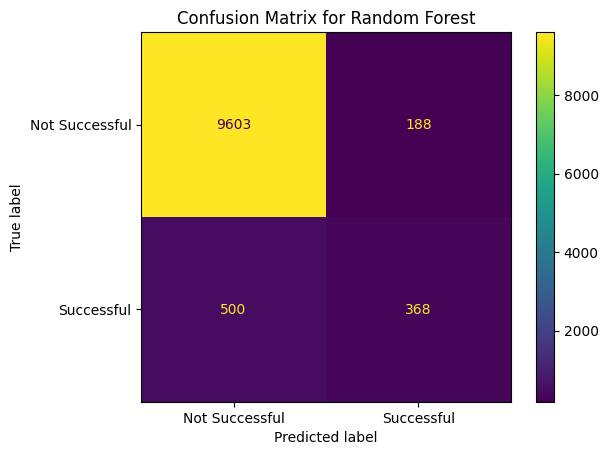

Random Forest Accuracy: 0.9354536072802326
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      9791
           1       0.66      0.42      0.52       868

    accuracy                           0.94     10659
   macro avg       0.81      0.70      0.74     10659
weighted avg       0.93      0.94      0.93     10659

ROC-AUC Score: 0.9343513887248094


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_rf, display_labels=['Not Successful', 'Successful']).plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Print evaluation metrics
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_rep_rf)
print("ROC-AUC Score:", roc_auc_rf)




the Random Forest model outperforms previous models by providing a better balance for both classes, making it a promising option for predicting campaign success. Further tuning or feature engineering could potentially improve recall for successful campaigns even more.

## Hyperparameter Tuning for Random Forest using Grid Search

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

<Figure size 800x600 with 0 Axes>

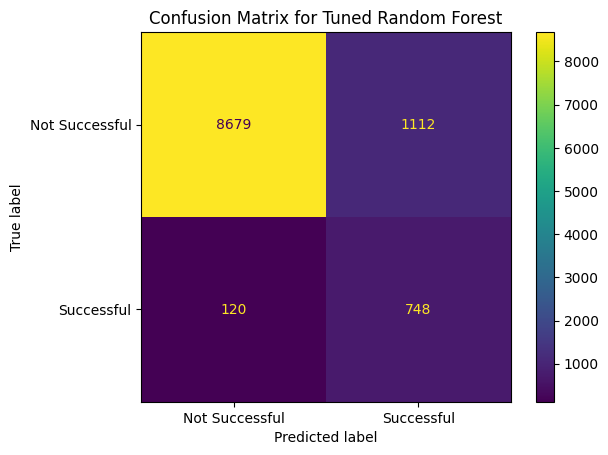

Tuned Random Forest Accuracy: 0.8844169246646026
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93      9791
           1       0.40      0.86      0.55       868

    accuracy                           0.88     10659
   macro avg       0.69      0.87      0.74     10659
weighted avg       0.94      0.88      0.90     10659

ROC-AUC Score: 0.9421052061824858


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearch
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_best_rf)
classification_rep_rf_tuned = classification_report(y_test, y_pred_best_rf)
roc_auc_rf_tuned = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Plot Confusion Matrix for the tuned model
cm_rf_tuned = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_rf_tuned, display_labels=['Not Successful', 'Successful']).plot()
plt.title("Confusion Matrix for Tuned Random Forest")
plt.show()

# Print the results
print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_rep_rf_tuned)
print("ROC-AUC Score:", roc_auc_rf_tuned)




The tuning focused on boosting recall for successful campaigns, which was achieved. While accuracy slightly decreased, the model is now more reliable in predicting campaign successes, making it more practical for marketing strategies aimed at identifying responsive customer segments.

## Feature Importance Analysis

For feature importance, the Random Forest model provides insights into which variables most significantly impact the prediction of campaign success.

Feature Importances:
            Feature  Importance
0         duration    0.275984
6     emp.var.rate    0.266897
2    cons.conf.idx    0.122367
5   cons.price.idx    0.095009
14        poutcome    0.058560
12         contact    0.040472
3              age    0.030987
1         previous    0.028733
9        education    0.019685
10         default    0.017416
8              job    0.014865
4         campaign    0.012588
7          marital    0.007465
13         housing    0.004831
11            loan    0.004141


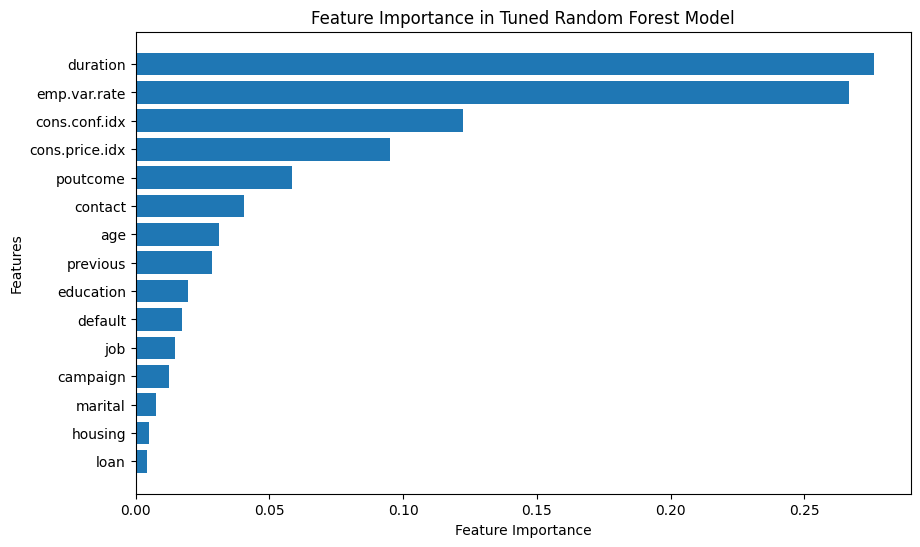

In [ ]:
# Extract feature importances from the tuned Random Forest model
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:\n", feature_importances)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Tuned Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

The feature importance analysis reveals that duration, employment variation rate (emp.var.rate), and consumer confidence index (cons.conf.idx) are the most influential predictors of campaign success, highlighting the significance of engagement time and economic sentiment on customer responsiveness. Moderate impact features, such as consumer price index and previous campaign outcomes, further suggest that economic indicators and past engagement levels play a role in campaign effectiveness. Lesser features, including contact type and age, contribute to predictions but with lower influence. Attributes like marital status and loan status show minimal impact, suggesting they are less relevant to the success of marketing campaigns. Prioritizing high-impact features can help refine strategies for targeting responsive customer segments and enhancing campaign outcomes.